# **Mechine Learning: the Prediction for Music based on Spotify**
## by Shimin Jiang (UBC ECON 323) 

# Introduction

**“Everybody is a genius. But if you judge a fish by its ability to climb a tree, it will live its whole life believing that it is stupid.”**

This is one of my favorite quotes from Albert Einstein. For me, it is not only a quote for life but also a quote that tells me the importance of associated dependent variables. For me, I like to try all types and I also want to know what kind of music will become a hit.

In this project, I will try to figure out **what makes songs popular** and predict **what kind of songs will be trending**.

In [3]:
# import packages
import numpy as np
import pandas as pd
import patsy
import sklearn
import sklearn.model_selection
import sklearn.ensemble
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import operator
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

# Data Setup

To achieve the goal of this project, I choose to analyze the data of **Spotify top 100 songs from 2010 to 2019** , and the data is downloaded from [Kaggle](https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019).

In [4]:
music=pd.read_csv("spotify.csv")
music

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the variables

In [5]:
music.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

Data Description


In [6]:
description=['title','artist','genre','']
music.describe().round(decimals=2)

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2014.39,121.26,69.50,66.88,-5.66,17.91,50.90,220.41,14.37,10.06,74.84,2014.50
std,3.24,26.24,15.96,13.12,2.03,13.43,21.56,39.93,19.45,9.28,8.81,2.87
min,1975.00,65.00,6.00,19.00,-18.00,2.00,4.00,113.00,0.00,2.00,35.00,2010.00
25%,2012.00,100.00,59.00,59.00,-7.00,9.00,35.00,197.00,2.00,4.00,70.00,2012.00
50%,2014.00,122.00,71.00,68.00,-5.00,12.00,50.50,216.00,6.00,6.00,76.00,2014.50
75%,2017.00,134.00,81.25,75.00,-4.00,23.00,68.00,237.00,19.00,12.00,81.00,2017.00
max,2021.00,206.00,98.00,96.00,-1.00,83.00,97.00,688.00,98.00,53.00,95.00,2019.00


The max year released is 2021, however this dataset is from 2010 to 2019, so I need to **correct the data**.

In [7]:
mask = (music["year released"] > 2019)
music[mask]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
69,Eenie Meenie,Sean Kingston,dance pop,2020.0,2022‑02‑17,121.0,64.0,73.0,-3.0,10.0,84.0,202.0,3.0,3.0,72.0,2010.0,Solo
98,We No Speak Americano (Edit),Yolanda Be Cool,australian dance,2020.0,2022‑02‑17,125.0,81.0,90.0,-5.0,9.0,75.0,157.0,7.0,5.0,65.0,2010.0,Duo
168,I Follow Rivers - The Magician Remix,Lykke Li,art pop,2021.0,2020‑06‑25,122.0,70.0,79.0,-6.0,8.0,30.0,280.0,2.0,4.0,67.0,2011.0,Solo
182,Read All About It,Professor Green,grime,2021.0,2020‑06‑16,101.0,75.0,66.0,-6.0,22.0,45.0,236.0,34.0,4.0,35.0,2011.0,Solo
608,Hurts So Good,Astrid S,alt z,2021.0,2020‑06‑08,120.0,63.0,67.0,-5.0,9.0,42.0,209.0,8.0,5.0,77.0,2016.0,Solo
651,Gold,Kiiara,alt z,2020.0,2020‑06‑08,113.0,41.0,60.0,-9.0,13.0,41.0,226.0,62.0,34.0,64.0,2016.0,Solo
901,Easier,5 Seconds of Summer,boy band,2020.0,2020‑06‑22,176.0,46.0,56.0,-4.0,11.0,62.0,158.0,48.0,26.0,74.0,2019.0,Band/Group
951,i'm so tired...,Lauv,dance pop,2020.0,2020‑06‑22,102.0,73.0,60.0,-7.0,24.0,53.0,163.0,18.0,20.0,81.0,2019.0,Solo
972,Options,NSG,afro dancehall,2020.0,2020‑08‑20,102.0,62.0,84.0,-5.0,10.0,76.0,240.0,39.0,9.0,62.0,2019.0,Band/Group


In [8]:
music.drop(music[mask].index, inplace = True)

In [9]:
music.dropna (inplace = True)

# Visualizations

To have a general idea of the data, let us visualize each variables for **whole decade**.

<Figure size 432x288 with 0 Axes>

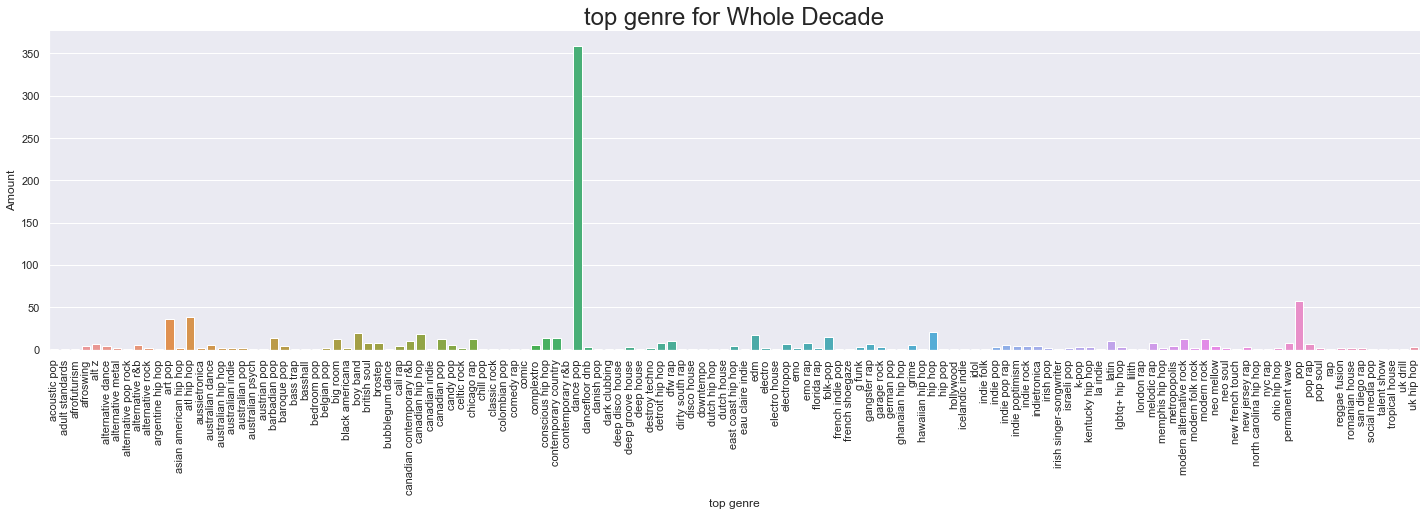

<Figure size 432x288 with 0 Axes>

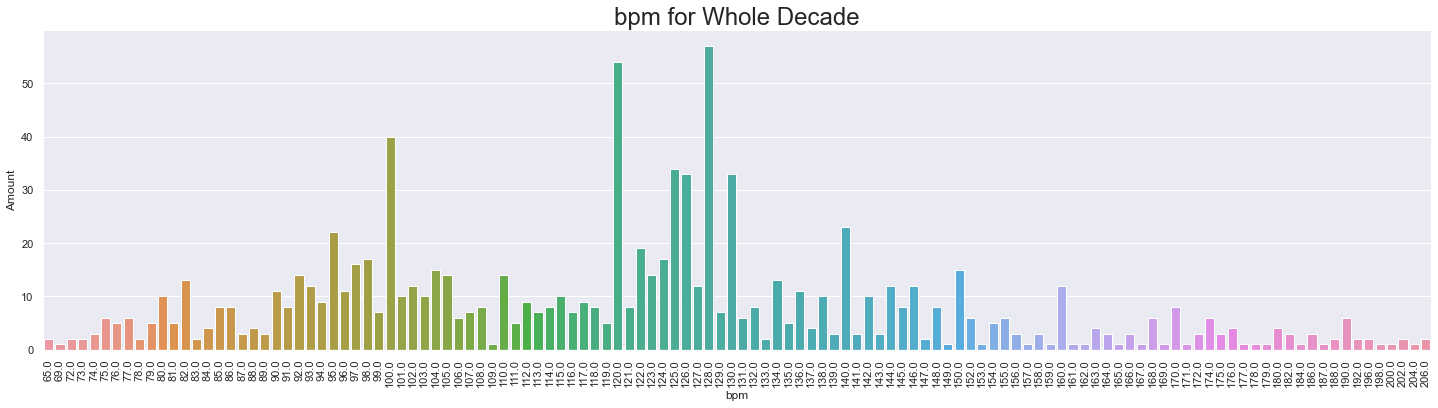

<Figure size 432x288 with 0 Axes>

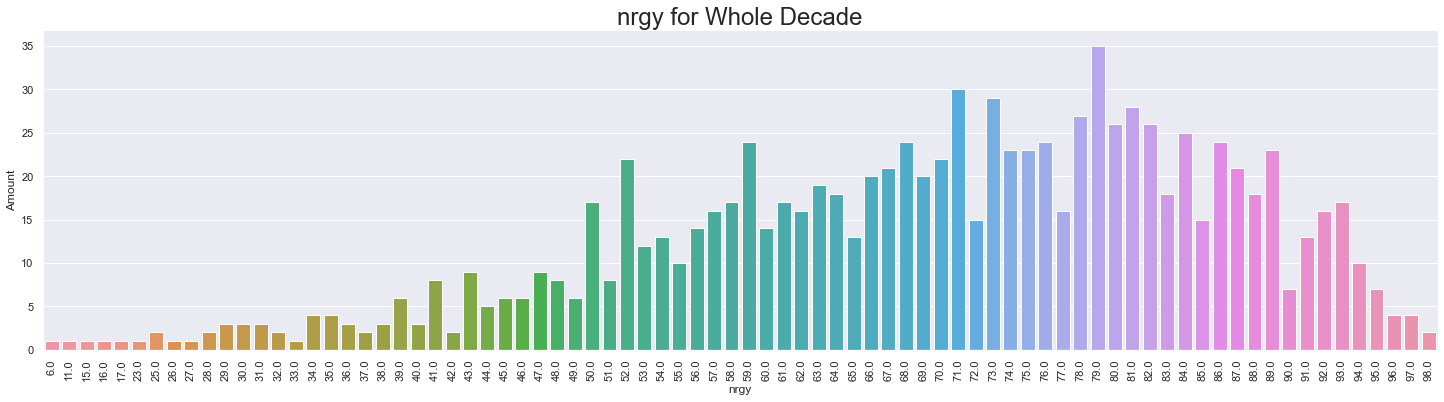

<Figure size 432x288 with 0 Axes>

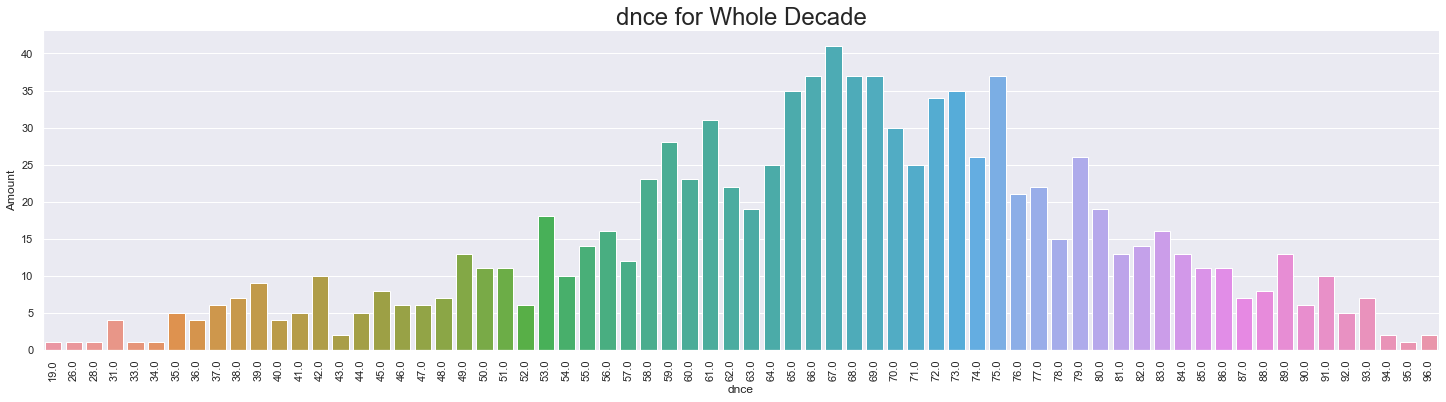

<Figure size 432x288 with 0 Axes>

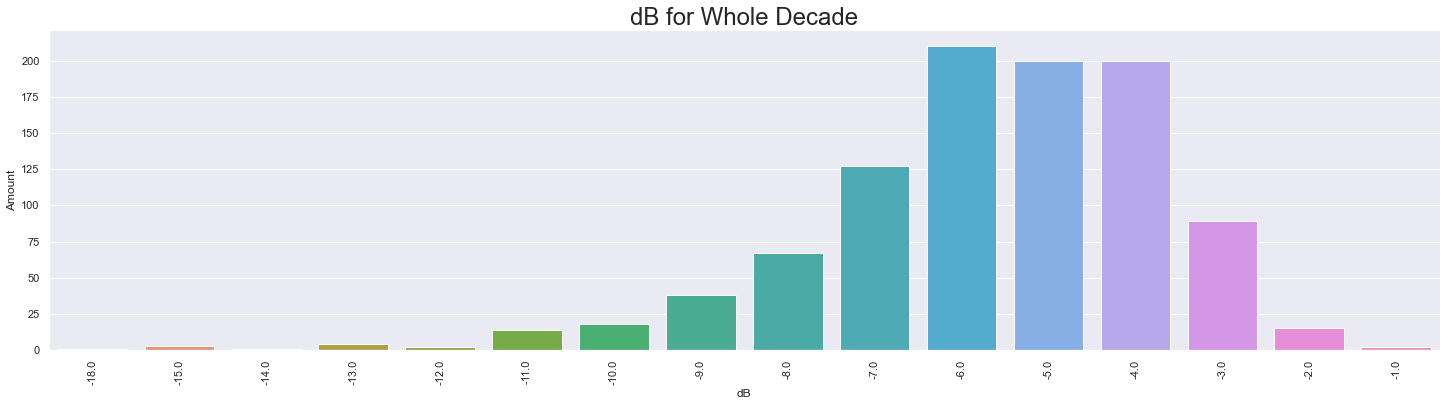

<Figure size 432x288 with 0 Axes>

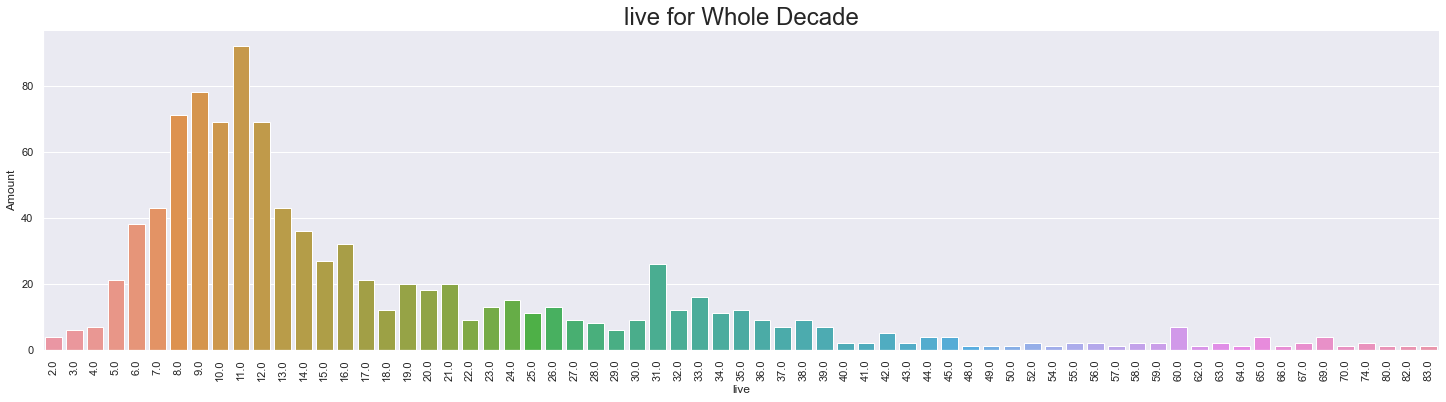

<Figure size 432x288 with 0 Axes>

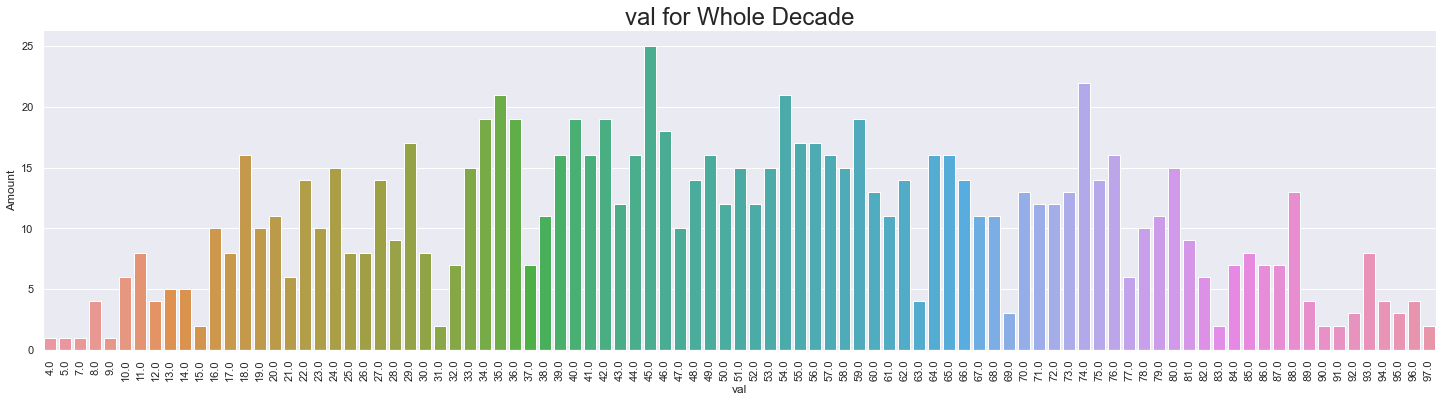

<Figure size 432x288 with 0 Axes>

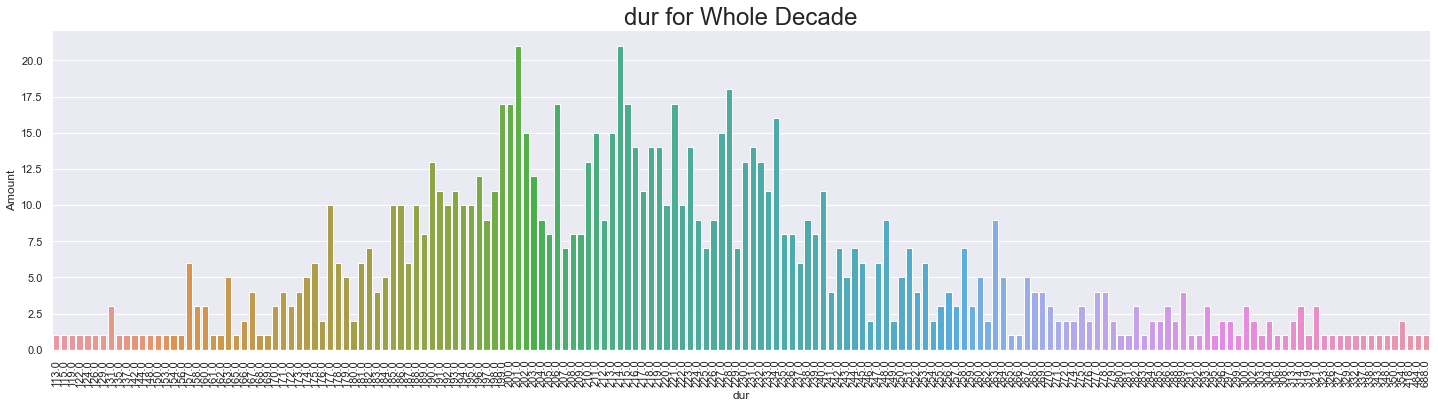

<Figure size 432x288 with 0 Axes>

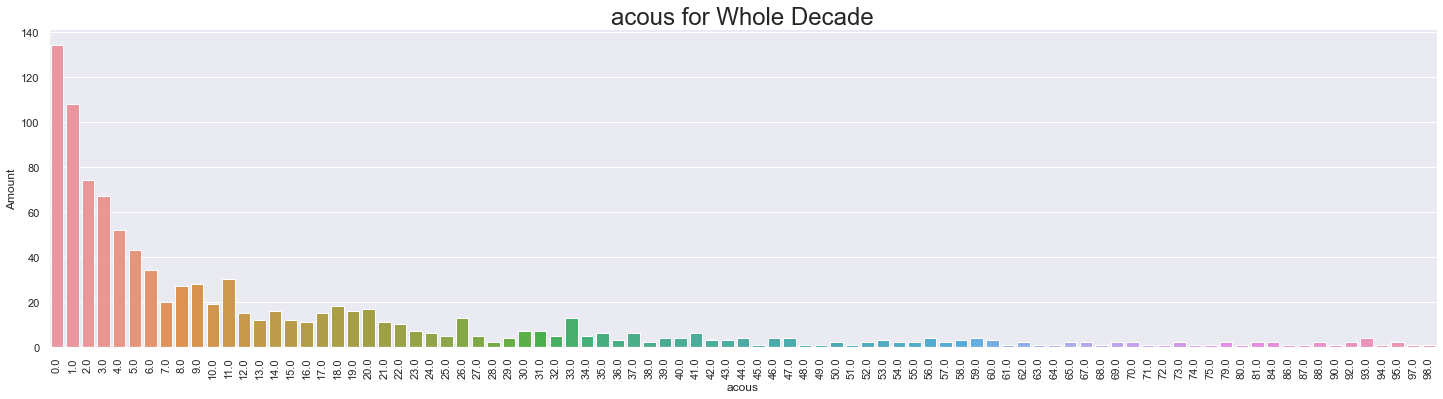

<Figure size 432x288 with 0 Axes>

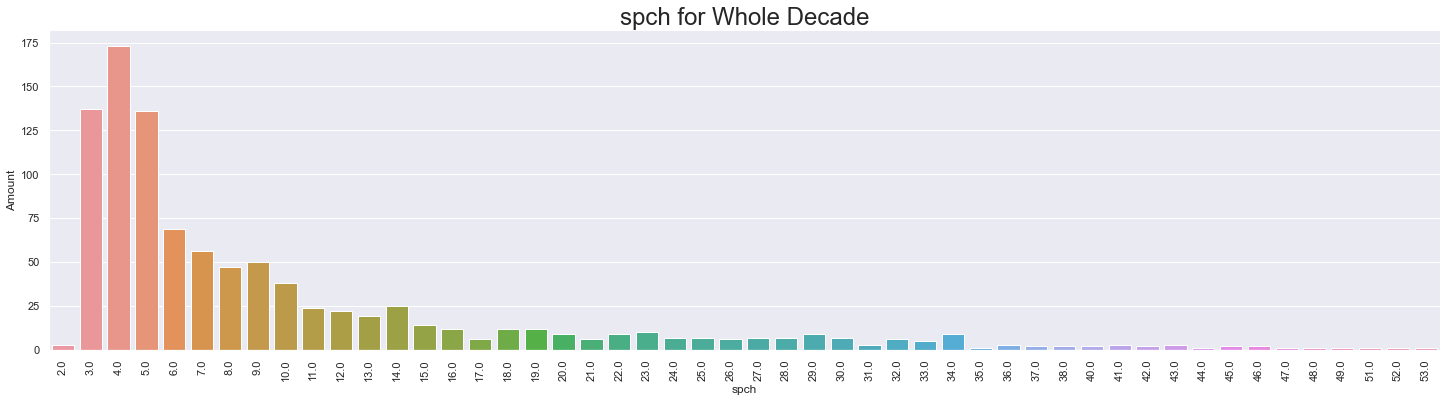

<Figure size 432x288 with 0 Axes>

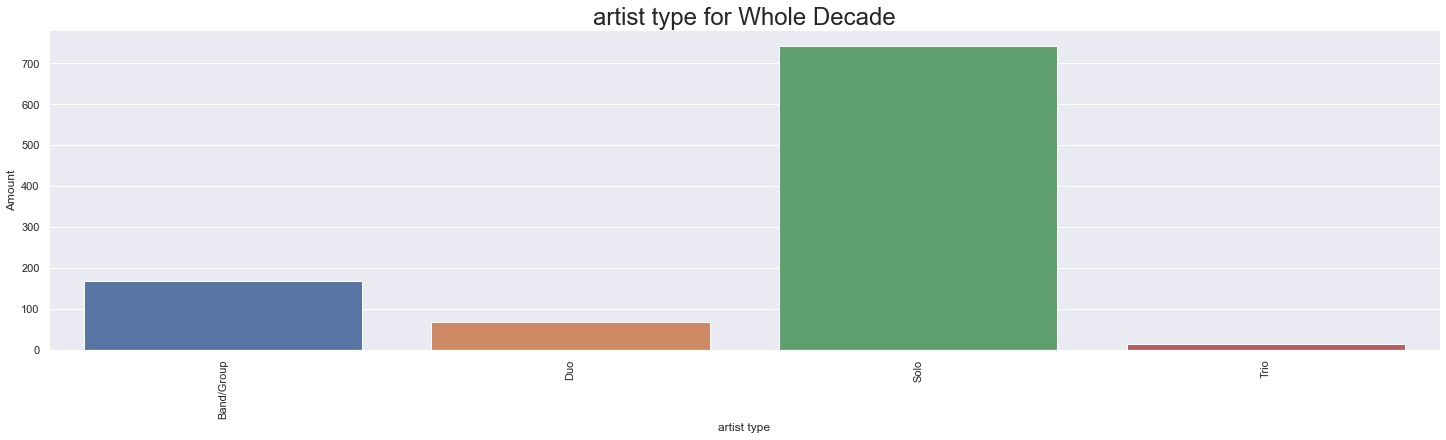

In [10]:
def visulize(s):
    #the function to visulize
    plt.clf()
    genre_music=music[[s,'title']].groupby(s).count().reset_index()
    sns.catplot(x=s,y='title',data=genre_music,kind='bar',aspect=4)
    plt.xticks(rotation=90)
    plt.xlabel(s)
    plt.ylabel('Amount')
    plt.title('{} for Whole Decade'.format(s),fontsize=24)
    plt.show()

#visulize each variables (columns)
for col in music.columns:
    #if != variables I don't want to analyze
    if col != 'title' and col != 'artist' and col != 'top year' and col != 'added' and col != 'pop' and col != 'year released': 
        visulize(col)

# Relationship Between Variables

<AxesSubplot:>

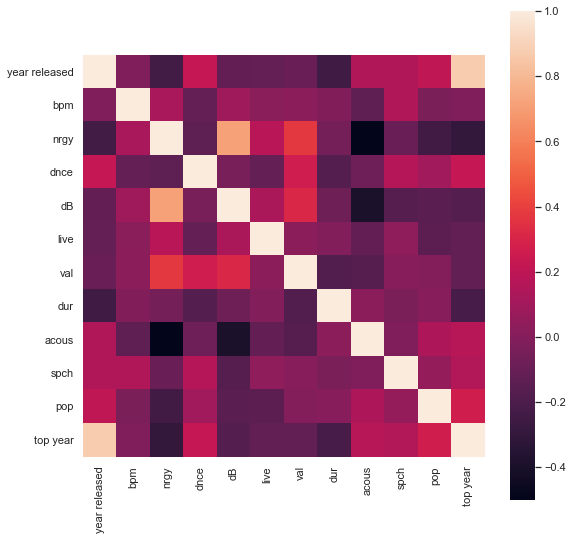

In [11]:
corrmat = music.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, square=True)

A lighter color means a stronger connection, 

so, from this graph we can know **Year the song was released (year released)** has a strong connection with **Year the song was a top hit (top year)**, 

and **How loud the song is (dB)** has a strong connection with **How energetic the song is (nrgy)**.

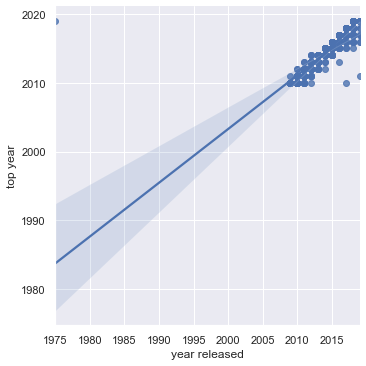

In [12]:
sns.lmplot(x = "year released", y = "top year", data = music)

In [13]:
sqft_lr_model = linear_model.LinearRegression()
sqft_lr_model.fit(music[["year released"]], music['top year'])
beta_0 = sqft_lr_model.intercept_
beta_1 = sqft_lr_model.coef_[0]
print(f"Fit model: top year(year released) = {beta_0:.4f} + {beta_1:.4f} year released")

Fit model: top year(year released) = 439.8232 + 0.7817 year released


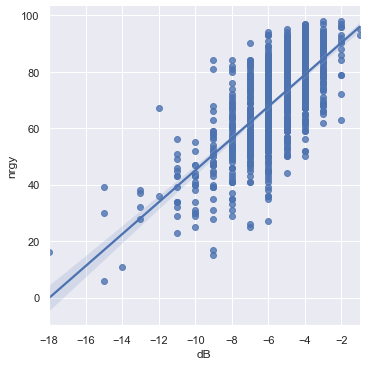

In [14]:
sns.lmplot(x = "dB", y = "nrgy", data = music)

In [15]:
sqft_lr_model = linear_model.LinearRegression()
sqft_lr_model.fit(music[["dB"]], music['nrgy'])
beta_0 = sqft_lr_model.intercept_
beta_1 = sqft_lr_model.coef_[0]
print(f"Fit model: nrgy(dB) = {beta_0:.4f} + {beta_1:.4f} dB")

Fit model: nrgy(dB) = 101.5445 + 5.6482 dB


# Trending Year by Year (Linear Regression)

Fit model: bpm(top year) = 464.4823 + -0.1704 top year
Fit model: nrgy(top year) = 3453.3028 + -1.6797 top year
Fit model: dnce(top year) = -2016.4228 + 1.0341 top year
Fit model: dB(top year) = 241.2766 + -0.1226 top year
Fit model: live(top year) = 1187.6234 + -0.5806 top year
Fit model: val(top year) = 1932.4499 + -0.9340 top year
Fit model: dur(top year) = 6252.8515 + -2.9945 top year
Fit model: acous(top year) = -2404.9684 + 1.2009 top year
Fit model: spch(top year) = -1027.2618 + 0.5149 top year


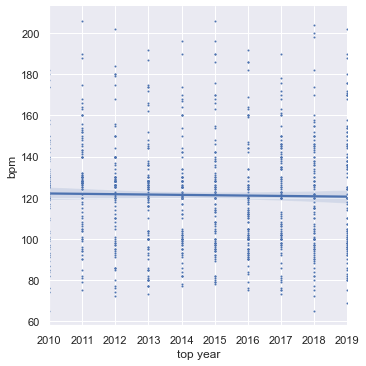

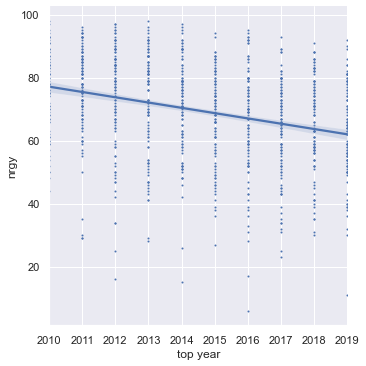

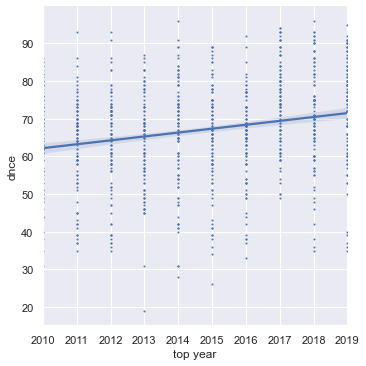

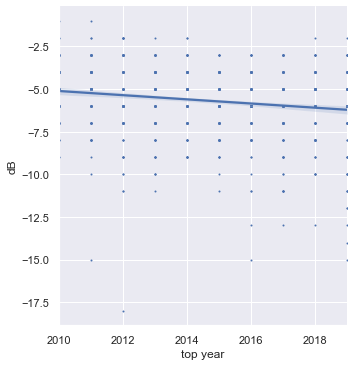

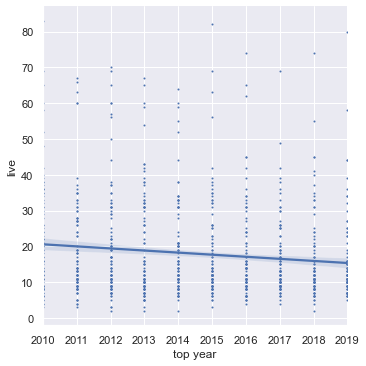

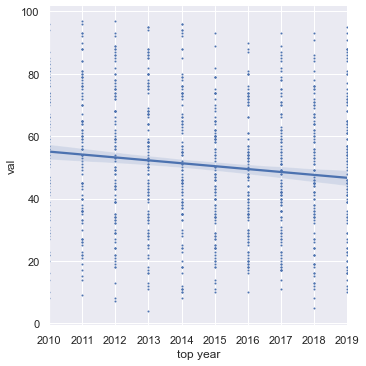

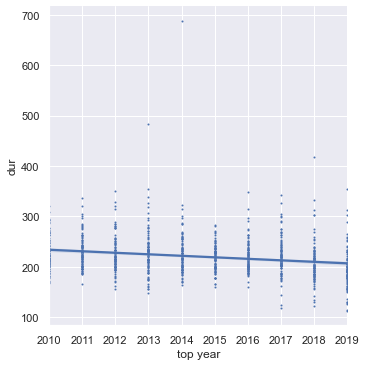

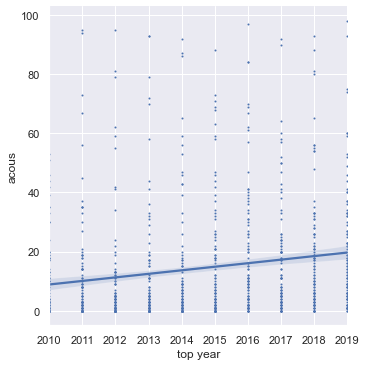

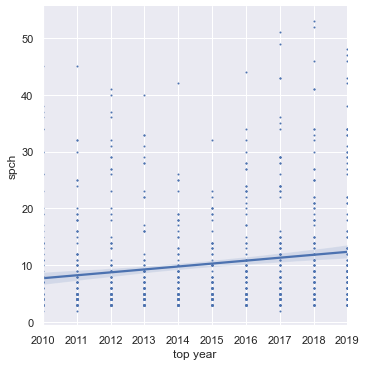

In [16]:
for col in music.columns:
    if col != 'title' and col != 'artist' and col != 'top year' and col != 'added' and col != 'pop' and col != 'year released' and col != 'top genre' and col != 'artist type': 
        sns.lmplot(data=music,x='top year',y=col,scatter_kws=dict(s=1,alpha=1))
        sqft_lr_model = linear_model.LinearRegression()
        sqft_lr_model.fit(music[["top year"]], music[col])
        beta_0 = sqft_lr_model.intercept_
        beta_1 = sqft_lr_model.coef_[0]
        print(f"Fit model: {col}(top year) = {beta_0:.4f} + {beta_1:.4f} top year")

# Feature Importances of Popularity (Random Forest Regression)

In [17]:
y = music['pop']
x = music[['year released','bpm','nrgy','dnce','dB','val','dur','acous','spch','top year']]

train_x, val_x, train_y, val_y = train_test_split(x,y)

clf = RandomForestRegressor().fit(train_x, train_y)

p_prediction = clf.predict(val_x)


In [18]:
print(f'MSE : {mean_squared_error(val_y, p_prediction)**0.5}')

MSE : 8.504502175792803


In [19]:
print(f'Standard Deviation: {cross_val_score(estimator = clf, X = train_x, y = train_y, cv = 5, n_jobs = -1).std()*100}%')


Standard Deviation: 5.78119887842166%


In [20]:
from sklearn.inspection import permutation_importance
print("Feature Importances: ")
pimp = permutation_importance(clf, val_x, val_y, random_state = 1)

for i in pimp.importances_mean.argsort()[-10:]:
    print(x.columns[i], pimp.importances_mean[i])

Feature Importances: 
bpm -0.00990011353439062
year released -0.005441700616320011
acous -0.004923754786753198
dB 0.0028389661927850085
spch 0.016743769216862582
dur 0.024012363086531475
dnce 0.03876082974771975
val 0.056786289621168565
top year 0.07311864255074367
nrgy 0.10029610945846004


# Conclusion


**Model we fit:**

bpm(top year) = 464.4823 + -0.1704 top year

nrgy(top year) = 3453.3028 + -1.6797 top year

dnce(top year) = -2016.4228 + 1.0341 top year

dB(top year) = 241.2766 + -0.1226 top year

live(top year) = 1187.6234 + -0.5806 top year

val(top year) = 1932.4499 + -0.9340 top year

dur(top year) = 6252.8515 + -2.9945 top year

acous(top year) = -2404.9684 + 1.2009 top year

spch(top year) = -1027.2618 + 0.5149 top year

top year(year released) = 439.8232 + 0.7817 year released

nrgy(dB) = 101.5445 + 5.6482 dB

**Top 4 feature importances of popularity we find:**

val 

dur

nrgy



# Prediction

In [21]:
def predic(y): #predic future hit music
    for col in ['val','dur','nrgy','year released']:
        sqft_lr_model = linear_model.LinearRegression()
        sqft_lr_model.fit(music[["top year"]], music[col])
        beta_0 = sqft_lr_model.intercept_
        beta_1 = sqft_lr_model.coef_[0]
        result= beta_0 + beta_1*y
        print(f'{y} most popular song will has {col} {result}')

predic(2020)
        

2020 most popular song will has val 45.713029933368944
2020 most popular song will has dur 204.04865365457954
2020 most popular song will has nrgy 60.313792956889756
2020 most popular song will has year released 2019.7233437624895


In [22]:
predic(2030)

2030 most popular song will has val 36.37274863446669
2030 most popular song will has dur 174.10408526655465
2030 most popular song will has nrgy 43.51681776018768
2030 most popular song will has year released 2029.5175717364893


# Makes the Project Public

Welcom to [My Github](https://github.com/JasmineJiang/econ_323_final_project)